In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('negative_samples_features.csv')

In [3]:
df2 = pd.read_csv('positive_samples_features.csv')

In [4]:
df3 = pd.concat([df, df2], ignore_index=True)

In [14]:
# ...existing code...
# mark negatives and positives, combine, then shuffle
df['label'] = 0
df2['label'] = 1
df3 = pd.concat([df, df2], ignore_index=True)

# shuffle randomly (set random_state for reproducible order)
df3 = df3.sample(frac=1, random_state=42).reset_index(drop=True)

# optional: save combined file
df3.to_csv('all_samples_features_labeled_shuffled.csv', index=False)
# ...existing code...

In [15]:
df3

,B11,B12,B2,B3,B4,B5,B6,B8,BSI,BSI_Mean,...,NDVI_Variance,NDWI,date,cloud_cover,lat,lon,label,actual_date,days_diff,target_date
0,1734.0,1197.0,530.0,692.0,616.0,1018.0,1676.0,2266.0,-0.086669,-0.050193,...,0.005810,-0.532116,2025-12-25 04:31:09,4.189571,27.302019,94.855566,0,NaN,NaN,NaN
1,2664.0,1916.0,740.0,1036.0,1476.0,1611.0,1937.0,2397.0,0.137832,0.125858,...,0.002476,-0.396446,2025-12-19 05:43:36,1.743647,19.400019,74.238342,0,NaN,NaN,NaN
2,4862.0,3462.0,1018.0,1550.0,2262.0,2809.0,3364.0,3936.0,0.179666,0.174342,...,0.000505,-0.434925,2025-12-25 05:13:32,0.000325,19.328879,82.675009,0,NaN,NaN,NaN
3,120.0,123.0,537.0,792.0,514.0,532.0,262.0,267.0,-0.118220,-0.112747,...,0.000303,0.495751,NaN,NaN,25.711990,84.865165,1,2025-02-13,0.000216,2025-02-13
4,142.0,135.0,521.0,673.0,468.0,511.0,162.0,169.0,-0.061538,-0.027848,...,0.001527,0.598575,NaN,NaN,25.526976,85.292753,1,2025-02-10,0.003791,2025-02-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,176.0,91.0,578.0,556.0,408.0,423.0,330.0,288.0,-0.194483,-0.187030,...,0.000325,0.317536,2025-12-15 05:15:09,6.541079,14.299677,79.604687,0,NaN,NaN,NaN
634,3747.0,2577.0,1198.0,1368.0,1604.0,2106.0,2628.0,3002.0,0.120511,0.111478,...,0.000084,-0.373913,2025-12-17 05:01:45,1.452922,24.577346,86.417445,0,NaN,NaN,NaN
635,1199.0,1149.0,652.0,734.0,943.0,997.0,1098.0,1294.0,0.047945,0.070877,...,0.000045,-0.276134,2025-12-19 05:44:01,2.519545,17.619908,75.215202,0,NaN,NaN,NaN
636,198.0,148.0,962.0,1212.0,1005.0,918.0,514.0,496.0,-0.095829,-0.087015,...,0.000092,0.419204,NaN,NaN,25.429599,87.766068,1,2021-11-30,0.007202,2021-11-23


In [20]:
# total missing values in the whole DataFrame
total_missing = df3.isna().sum().sum()
print("Total missing values:", total_missing)

# missing per column
missing_per_col = df3.isna().sum()
print(missing_per_col)

# missing percentage per column
missing_pct_col = df3.isna().mean() * 100
print(missing_pct_col)

# number of rows that have any missing value
rows_with_any_missing = df3.isna().any(axis=1).sum()
print("Rows with any missing:", rows_with_any_missing)

# distribution of how many missing values each row has
missing_per_row_counts = df3.isna().sum(axis=1).value_counts().sort_index()
print(missing_per_row_counts)

Total missing values: 1661
B11                 0
B12                 0
B2                  0
B3                  0
B4                  0
B5                  0
B6                  0
B8                  0
BSI                 0
BSI_Mean            0
Clay_Ratio          0
Iron_Ratio          0
MNDWI               0
MNDWI_Variance      0
NDTI                0
NDVI                0
NDVI_Entropy        0
NDVI_Variance       0
NDWI                0
date              244
cloud_cover       244
lat                 0
lon                 0
label               0
actual_date       391
days_diff         391
target_date       391
dtype: int64
B11                0.000000
B12                0.000000
B2                 0.000000
B3                 0.000000
B4                 0.000000
B5                 0.000000
B6                 0.000000
B8                 0.000000
BSI                0.000000
BSI_Mean           0.000000
Clay_Ratio         0.000000
Iron_Ratio         0.000000
MNDWI              0.000000
MN

In [8]:
cols = df.columns.tolist()
print(cols)

['B11', 'B12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B8', 'BSI', 'BSI_Mean', 'Clay_Ratio', 'Iron_Ratio', 'MNDWI', 'MNDWI_Variance', 'NDTI', 'NDVI', 'NDVI_Entropy', 'NDVI_Variance', 'NDWI', 'date', 'cloud_cover', 'lat', 'lon']


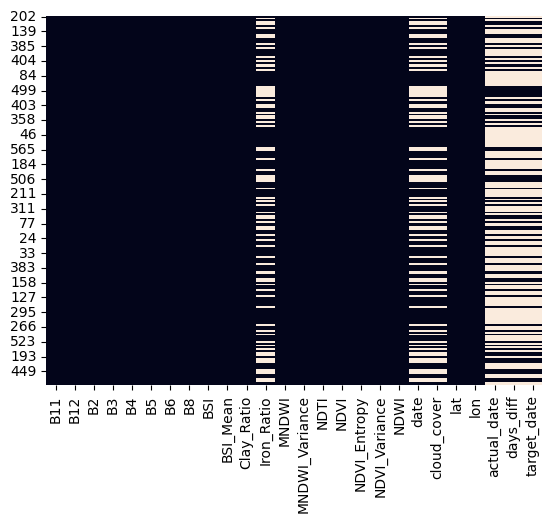

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df3.isna().astype(int).sample(min(200, len(df3))), cbar=False)
plt.show()

In [13]:
df3.to_csv('all_samples_features.csv', index=False)

In [18]:
import pandas as pd
import numpy as np

# 1. Load your data
# df = pd.read_csv('final_dataset_merged.csv') 

# 2. Check and Calculate Iron Ratio
# Formula: Red (B4) / Blue (B2)

# If the column doesn't exist, create it
if 'Iron_Ratio' not in df3.columns:
    print("Iron_Ratio column missing. Calculating now...")
    df3['Iron_Ratio'] = df3['B4'] / df3['B2']

# If the column exists but has NaNs, fill ONLY the NaNs
else:
    print("Iron_Ratio column exists. Filling missing values...")
    # This only updates rows where Iron_Ratio is NaN
    df3['Iron_Ratio'] = df3['Iron_Ratio'].fillna(df3['B4'] / df3['B2'])

# 3. Verification
print(f"Missing Iron_Ratio values: {df3['Iron_Ratio'].isnull().sum()}")

# Optional: Handle infinite values if B2 is 0 (rare but possible)
df3.replace([np.inf, -np.inf], np.nan, inplace=True)
df3.dropna(subset=['Iron_Ratio'], inplace=True)

# Save or continue to training
# df.to_csv('data_with_iron_ratio.csv', index=False)


Iron_Ratio column exists. Filling missing values...
Missing Iron_Ratio values: 3


In [19]:
df3.to_csv('all_samples_features2.csv', index=False)

In [1]:
import pandas as pd
import numpy as np

Extracting road distance

In [1]:
import pandas as pd

# Read your CSV file
df = pd.read_csv(r'C:\Users\Ashwa\Ash_projects\ManKaavalCopy\bihar.csv')

# Create ID column (assigns sequential integers starting from 0)
df['id'] = range(len(df))

# Alternatively, start ID from 1:
# df['id'] = range(1, len(df) + 1)

# Save the full dataframe with ID column
df.to_csv('bihar_data_with_id.csv', index=False)

# Extract only id, lat, lon columns to a new dataframe
location_df = df[['id', 'lat', 'lon']]

# Save the extracted columns to a separate CSV file
location_df.to_csv('locationsBihar.csv', index=False)

print(f"Full dataset with ID saved: {len(df)} rows")
print(f"Location file created with columns: {list(location_df.columns)}")


Full dataset with ID saved: 7507 rows
Location file created with columns: ['id', 'lat', 'lon']


In [3]:
df = pd.read_csv(r'C:\Users\Ashwa\Ash_projects\ManKaaval\dataset\training\all_samples_features2_with_id_with_road_distance.csv')

In [7]:
distances_km = df['dist_to_road_km']

✓ Distance calculation complete!

Distance Statistics:
  Mean: 3.902 km
  Median: 0.476 km
  Min: 0.000 km
  Max: 437.701 km

ANALYSIS: Flagged vs Non-Flagged Sites

Flagged Sites (Mines):
  Count: 244
  Mean Distance: 2.314 km
  Median Distance: 0.414 km
  Std Dev: 27.992 km

Non-Flagged Sites (Safe):
  Count: 391
  Mean Distance: 4.893 km
  Median Distance: 0.530 km
  Std Dev: 37.400 km

Statistical Significance (t-test):
  t-statistic: -0.9271
  p-value: 0.354226
  ✗ No significant difference (p >= 0.05)

Sample of Enhanced Dataset:
   id        lat        lon  dist_to_road_km
0   1  27.302019  94.855566         0.018816
1   2  19.400019  74.238342         0.524239
2   3  19.328879  82.675009         0.164707
3   4  25.711990  84.865165         1.581876
4   5  25.526976  85.292753         0.060697
5   6  25.783352  91.953050         1.438906
6   7  25.662593  84.917929         0.347583
7   8  19.047006  81.996393         0.186520
8   9  31.293337  76.705554         0.148824
9  10  1

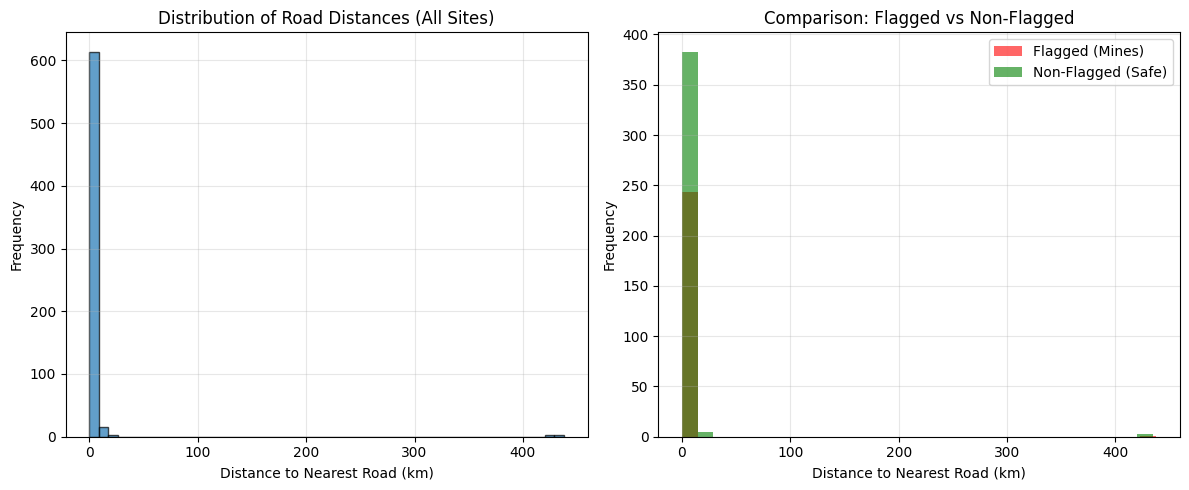


ANALYSIS COMPLETE!


In [8]:
print(f"✓ Distance calculation complete!")
print(f"\nDistance Statistics:")
print(f"  Mean: {distances_km.mean():.3f} km")
print(f"  Median: {np.median(distances_km):.3f} km")
print(f"  Min: {distances_km.min():.3f} km")
print(f"  Max: {distances_km.max():.3f} km")

# CELL 8: Analyze Flagged vs Non-Flagged Sites
# Assuming you have a column 'label' where 1 = Mine, 0 = Non-Mine
# Replace 'label' with your actual column name

if 'label' in df.columns:
    print("\n" + "="*60)
    print("ANALYSIS: Flagged vs Non-Flagged Sites")
    print("="*60)

    flagged = df[df['label'] == 1]['dist_to_road_km']
    non_flagged = df[df['label'] == 0]['dist_to_road_km']

    print(f"\nFlagged Sites (Mines):")
    print(f"  Count: {len(flagged)}")
    print(f"  Mean Distance: {flagged.mean():.3f} km")
    print(f"  Median Distance: {flagged.median():.3f} km")
    print(f"  Std Dev: {flagged.std():.3f} km")

    print(f"\nNon-Flagged Sites (Safe):")
    print(f"  Count: {len(non_flagged)}")
    print(f"  Mean Distance: {non_flagged.mean():.3f} km")
    print(f"  Median Distance: {non_flagged.median():.3f} km")
    print(f"  Std Dev: {non_flagged.std():.3f} km")

    # Statistical test
    from scipy import stats
    t_stat, p_value = stats.ttest_ind(flagged, non_flagged)
    print(f"\nStatistical Significance (t-test):")
    print(f"  t-statistic: {t_stat:.4f}")
    print(f"  p-value: {p_value:.6f}")
    if p_value < 0.05:
        print(f"  ✓ Significant difference (p < 0.05)")
    else:
        print(f"  ✗ No significant difference (p >= 0.05)")
else:
    print("\n⚠ Warning: No 'label' column found. Skipping comparison analysis.")
    print("   Make sure your CSV has a column indicating mine (1) vs non-mine (0).")

# CELL 10: Display Sample of Enhanced Data
print(f"\nSample of Enhanced Dataset:")
print(df[['id', 'lat', 'lon', 'dist_to_road_km']].head(10))

# CELL 11: Optional - Create Histogram
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['dist_to_road_km'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Distance to Nearest Road (km)')
plt.ylabel('Frequency')
plt.title('Distribution of Road Distances (All Sites)')
plt.grid(alpha=0.3)

if 'label' in df.columns:
    plt.subplot(1, 2, 2)
    plt.hist(flagged, bins=30, alpha=0.6, label='Flagged (Mines)', color='red')
    plt.hist(non_flagged, bins=30, alpha=0.6, label='Non-Flagged (Safe)', color='green')
    plt.xlabel('Distance to Nearest Road (km)')
    plt.ylabel('Frequency')
    plt.title('Comparison: Flagged vs Non-Flagged')
    plt.legend()
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('road_distance_analysis.png', dpi=300, bbox_inches='tight')
print("\n✓ Histogram saved as: road_distance_analysis.png")
plt.show()

print("\n" + "="*60)
print("ANALYSIS COMPLETE!")
print("="*60)

Saved histogram to road_distance_analysis_clipped.png. Excluded 24 rows outside 0–8.0 km.


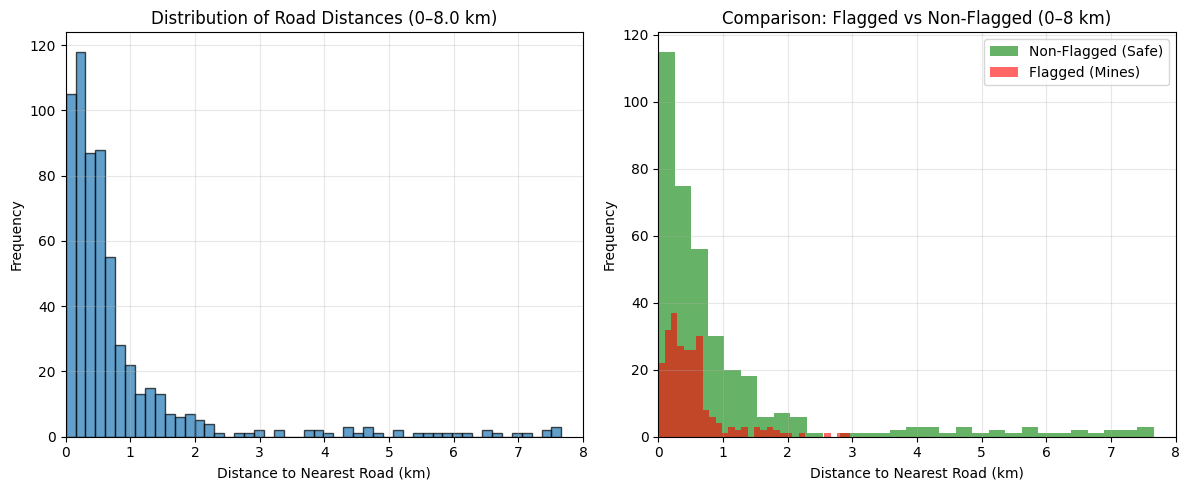

Saved histogram to road_distance_analysis_clipped.png. Excluded 24 rows outside 0–8.0 km.


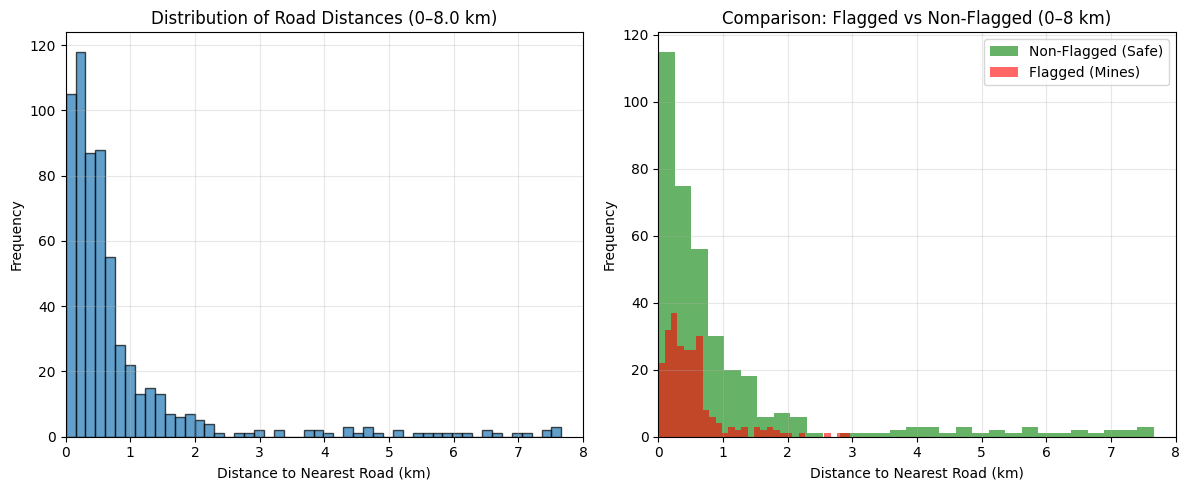

In [10]:
# ...existing code...
import matplotlib.pyplot as plt

# Plot only distances in [0, 8] km to ignore the 400 km outlier
max_x = 8.0
df_plot = df[df['dist_to_road_km'].between(0, max_x)]
n_excluded = len(df) - len(df_plot)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_plot['dist_to_road_km'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Distance to Nearest Road (km)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Road Distances (0–{max_x} km)')
plt.xlim(0, max_x)
plt.grid(alpha=0.3)

if 'label' in df.columns:
    plt.subplot(1, 2, 2)
    flagged = df_plot[df_plot['label'] == 1]['dist_to_road_km']
    non_flagged = df_plot[df_plot['label'] == 0]['dist_to_road_km']
    plt.hist(non_flagged, bins=30, alpha=0.6, label='Non-Flagged (Safe)', color='green')
    plt.hist(flagged, bins=30, alpha=0.6, label='Flagged (Mines)', color='red')
    plt.xlabel('Distance to Nearest Road (km)')
    plt.ylabel('Frequency')
    plt.title('Comparison: Flagged vs Non-Flagged (0–8 km)')
    plt.legend()
    plt.xlim(0, max_x)
    plt.grid(alpha=0.3)

plt.tight_layout()
out_name = 'road_distance_analysis_clipped.png'
plt.savefig(out_name, dpi=300, bbox_inches='tight')
print(f"Saved histogram to {out_name}. Excluded {n_excluded} rows outside 0–{max_x} km.")
plt.show()
# ...existing code...
# filepath: c:\Users\Ashwa\Ash_projects\ManKaaval\dataset\experimenting.ipynb
# ...existing code...
import matplotlib.pyplot as plt

# Plot only distances in [0, 8] km to ignore the 400 km outlier
max_x = 8.0
df_plot = df[df['dist_to_road_km'].between(0, max_x)]
n_excluded = len(df) - len(df_plot)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_plot['dist_to_road_km'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Distance to Nearest Road (km)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Road Distances (0–{max_x} km)')
plt.xlim(0, max_x)
plt.grid(alpha=0.3)

if 'label' in df.columns:
    plt.subplot(1, 2, 2)
    flagged = df_plot[df_plot['label'] == 1]['dist_to_road_km']
    non_flagged = df_plot[df_plot['label'] == 0]['dist_to_road_km']
    plt.hist(non_flagged, bins=30, alpha=0.6, label='Non-Flagged (Safe)', color='green')
    plt.hist(flagged, bins=30, alpha=0.6, label='Flagged (Mines)', color='red')
    plt.xlabel('Distance to Nearest Road (km)')
    plt.ylabel('Frequency')
    plt.title('Comparison: Flagged vs Non-Flagged (0–8 km)')
    plt.legend()
    plt.xlim(0, max_x)
    plt.grid(alpha=0.3)

plt.tight_layout()
out_name = 'road_distance_analysis_clipped.png'
plt.savefig(out_name, dpi=300, bbox_inches='tight')
print(f"Saved histogram to {out_name}. Excluded {n_excluded} rows outside 0–{max_x} km.")
plt.show()
# ...existing code...

In [1]:
import ee

# This triggers the authentication flow in your browser
try:
    ee.Authenticate()
    ee.Initialize()
    print("✅ Authentication Successful! You can close this and run your dashboard.")
except Exception as e:
    print(f"❌ Error: {e}")


❌ Error: Cannot authenticate: Invalid request.
